# PyDistMesh

There are some cases where pydistmesh struggles to solve

- decreasing the initial edge length can help find a solution
- on straight edges that should be in the final solution, oversample if you're sure these points must be present

Always plot your distance function first

In [4]:
%matplotlib inline
import networkx as nx
import distmesh as dm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mptri

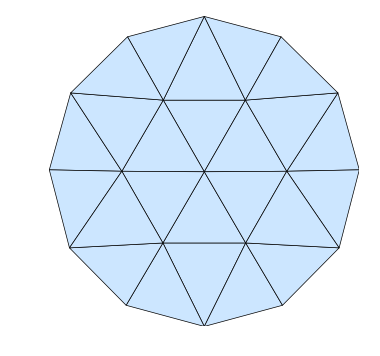

In [32]:
fd = lambda p: np.sqrt((p**2).sum(1))-1.0
p, t = dm.distmesh2d(fd, dm.huniform, 0.4, (-1,-1,1,1))

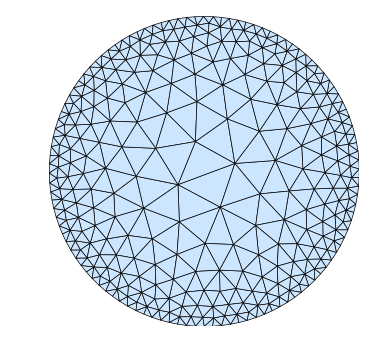

In [5]:
fd = lambda p: np.sqrt((p**2).sum(1))-1.0
fh = lambda p: -0.5*fd(p)+0.1
p, t = dm.distmesh2d(fd, fh, 0.05, (-1,-1,1,1))

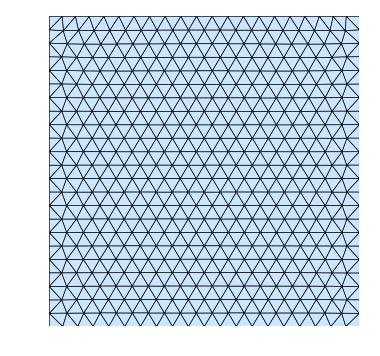

In [13]:
fd = lambda p: dm.drectangle(p,-1,1,-1,1)
p, t = dm.distmesh2d(fd, dm.huniform, 0.1, (-1,-1,1,1),
                     [(-1,-1),(-1,1),(1,-1),(1,1)])

(50, 50)


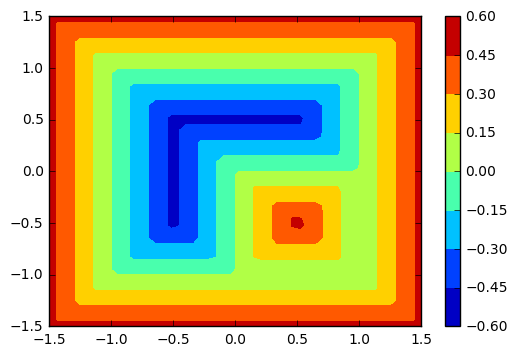

In [87]:
fd = lambda p: dm.ddiff(dm.drectangle(p,-1,1,-1,1),
                        dm.drectangle(p, 0,1,-1,0))

n = 50
xaxis = np.linspace(-1.5, 1.5, n)
yaxis = np.linspace(-1.5, 1.5, n)
x, y = np.meshgrid(xaxis, yaxis)
xo = x.reshape(1, -1)
yo = y.reshape(1, -1)
xy = np.vstack([xo,yo])
z = fd(xy.T).reshape(n,n)
print z.shape
#z[i, j] = fd2(x[i, j], y[i, j])
plt.contourf(x, y, z)
plt.colorbar()

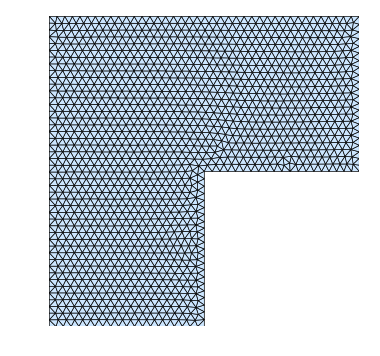

In [89]:
p, t = dm.distmesh2d(fd, dm.huniform, 0.05, (-1,-1,1,1),
                     [(-1,-1),(0,-1),(0,-0.5),(0,0),(0.5,0),(1,0),(-1,1),(1,1)])

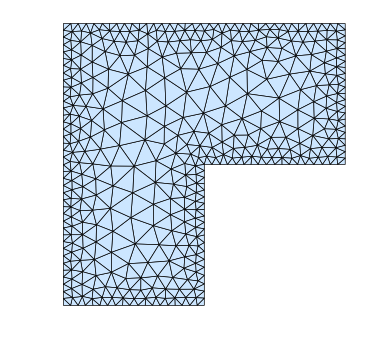

In [91]:
fd = lambda p: dm.ddiff(dm.drectangle(p,-1,1,-1,1),
                        dm.drectangle(p, 0,1,-1,0))
fh = lambda p: - 0.5*fd(p)+0.1
p, t = dm.distmesh2d(fd, fh, 0.05, (-1.1,-1.1,1.1,1.1),
                    [(-1,-1),(0,-1),(0,-0.5),(0,0),(0.5,0),(1,0),(-1,1),(1,1)])

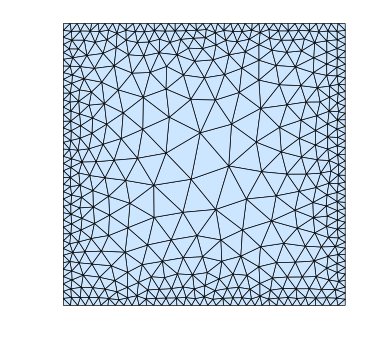

In [79]:
fd = lambda p: dm.drectangle(p,-1,1,-1,1)
fh = lambda p: - 0.5*fd(p)+0.1
p, t = dm.distmesh2d(fd, fh, 0.05, (-1.1,-1.1,1.1,1.1),
                     [(-1,-1),(-1,1),(1,-1),(1,1)])

In [16]:
help(dm.distmesh2d)

Help on function distmesh2d in module distmesh._distmesh2d:

distmesh2d(fd, fh, h0, bbox, pfix=None, fig='gcf')
    distmesh2d: 2-D Mesh Generator using Distance Functions.
    
    Usage
    -----
    >>> p, t = distmesh2d(fd, fh, h0, bbox, pfix)
    
    Parameters
    ----------
    fd:        Distance function d(x,y)
    fh:        Scaled edge length function h(x,y)
    h0:        Initial edge length
    bbox:      Bounding box, (xmin, ymin, xmax, ymax)
    pfix:      Fixed node positions, shape (nfix, 2)
    fig:       Figure to use for plotting, or None to disable plotting.
    
    Returns
    -------
    p:         Node positions (Nx2)
    t:         Triangle indices (NTx3)
    
    Example: (Uniform Mesh on Unit Circle)
    >>> fd = lambda p: sqrt((p**2).sum(1))-1.0
    >>> p, t = distmesh2d(fd, huniform, 2, (-1,-1,1,1))
    
    Example: (Rectangle with circular hole, refined at circle boundary)
    >>> fd = lambda p: ddiff(drectangle(p,-1,1,-1,1), dcircle(p,0,0,0.5))
    >>>